In [2]:
import pandas as pd
df = pd.read_csv('class.csv',  thousands='.', decimal=',', sep=',')
df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [3]:
pass_data = pd.read_csv('zoo.csv',  thousands='.', decimal=',', sep=',')
pass_data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Этот набор данных состоит из 101 животного из зоопарка. 
7 Типов классов: Млекопитающие, Птицы, Рептилии, Рыбы, Амфибии, Насекомые и Беспозвоночные

Существует 16 переменных с различными признаками для описания животных.

название вида живного

Логические переменные:

-наличие волос 
-наличие перьев 
-возможность откладывать яйца 
-вскармливание молоком 

-летающие 
-плавающие
-хищники
-зубастые
-позвоночные
-наличие жабр 
-ядовитые
-наличие плавников
-наличие хвоста
-домашниие или дикие
-размер живтного (примерно как кошка)
кол-во ног (набор значений: {0,2,4,5,6,8})

In [4]:
print(pass_data.shape)
pass_data.drop_duplicates(inplace=True)
print(pass_data.shape)
#нет дубоикатов данных в этом наборе

(101, 18)
(101, 18)


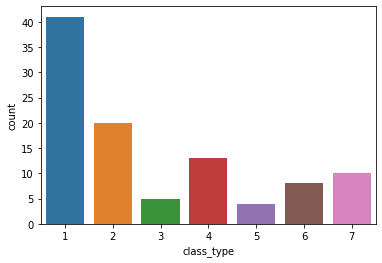

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'class_type', data = pass_data)
plt.show()

На гисторграмме видно, что классы не сбалансированы, следовательно будем использовать PR-кривую


numerical:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic']
categorial:  []


<AxesSubplot:>

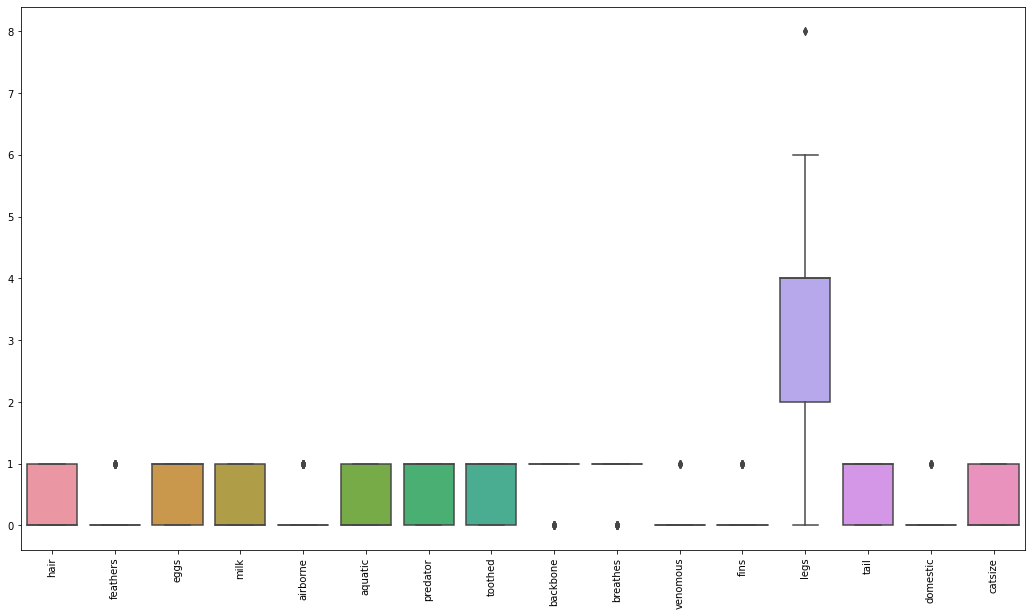

In [6]:
numerical_columns = [i for i in pass_data.columns[1:16] if pass_data[i].dtype.name != 'object']

categorial_columns = [i for i in pass_data.columns[1:16] if pass_data[i].dtype.name == 'object']

print('numerical: ', numerical_columns)

print('categorial: ', categorial_columns)

total_num = pass_data.drop(columns = 'class_type', axis = 1)

fig = plt.figure(figsize=(18, 10))

plt.xticks(rotation='vertical')

sns.boxplot(data = total_num)

Способ масштабирования - нормализация

<AxesSubplot:>

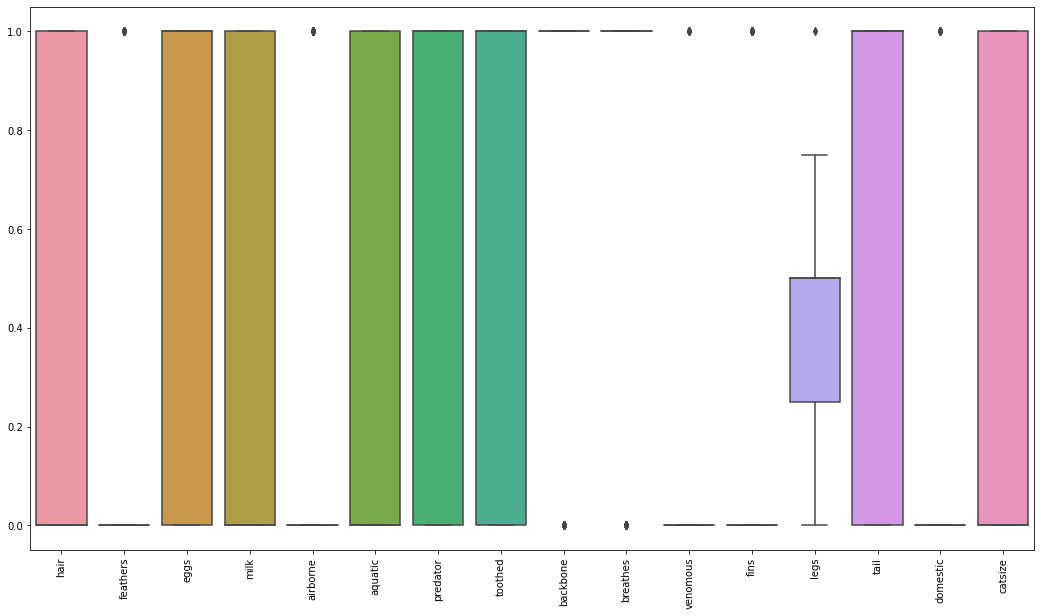

In [7]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

columns = numerical_columns

total_num[columns] = scaler.fit_transform(total_num[columns])

fig = plt.figure(figsize=(18, 10))

plt.xticks(rotation='vertical')

sns.boxplot(data = total_num)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


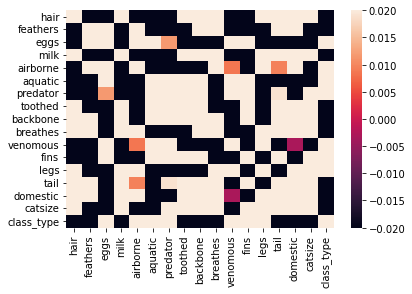

In [8]:
sns.heatmap(pass_data.corr(), vmin = -0.02, vmax = 0.02)

pass_data.corr()

In [9]:
categorical_attributes = [column for column in pass_data.columns if pass_data[column].dtype.name == 'object']

print(categorical_attributes)

pass_data = pass_data.drop(categorical_attributes, axis=1)


['animal_name']


In [10]:
pass_data.count()
pass_data.shape

(101, 17)

In [11]:
import numpy as np

import sklearn as skl

from sklearn.preprocessing import label_binarize

from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.calibration import CalibratedClassifierCV

%matplotlib inline

import matplotlib.pyplot as plt

In [12]:
x = pass_data.drop(['class_type'], axis=1)

y = pass_data['class_type']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
rnc = RadiusNeighborsClassifier()

params = {'radius': np.arange(1, 10)}

In [15]:
rnc_grid = GridSearchCV(rnc, params)

In [16]:
rnc_grid.fit(x_train, y_train)

C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 666, in score
    return accur

GridSearchCV(estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [17]:
best_radius = rnc_grid.best_estimator_.radius

best_accuracy = rnc_grid.best_score_

In [18]:
rnc = RadiusNeighborsClassifier(radius=best_radius)

rnc.fit(x_train, y_train)

pred = rnc.predict(x_test)    

In [19]:
print("Accuracy:", accuracy_score(y_test, pred))

print('Best Accuracy:', best_accuracy, ' at radius:', best_radius)

Accuracy: 0.9047619047619048
Best Accuracy: 0.75  at radius: 3


In [20]:
from sklearn.linear_model import Perceptron

In [21]:
x = pass_data.drop(['class_type'], axis=1)

y = pass_data['class_type']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
ppn = Perceptron(verbose=0, random_state=None, fit_intercept=True, eta0=0.001)

In [24]:
ppn.fit(x_train, y_train)

Perceptron(eta0=0.001, random_state=None)

In [25]:
print ("The accuracy of the classifier on training data is {:.2f} out of 1".format(ppn.score(x_train, y_train)))
print ("The accuracy of the classifier on test data is {:.2f} out of 1".format(ppn.score(x_test, y_test)))
print (ppn.coef_)

The accuracy of the classifier on training data is 0.93 out of 1
The accuracy of the classifier on test data is 0.95 out of 1
[[ 0.004 -0.001 -0.004  0.004  0.    -0.001  0.001  0.001  0.     0.
  -0.001  0.     0.    -0.002  0.     0.001]
 [-0.001  0.008  0.    -0.002  0.003 -0.003  0.    -0.005  0.002  0.002
  -0.001 -0.003 -0.002  0.002  0.     0.001]
 [-0.004 -0.005  0.001 -0.005 -0.003 -0.007  0.001  0.003  0.004 -0.001
   0.002 -0.007 -0.002  0.002  0.    -0.001]
 [-0.001  0.     0.001 -0.002  0.     0.     0.     0.     0.    -0.002
  -0.001  0.001 -0.004  0.001 -0.001  0.001]
 [-0.005 -0.003  0.    -0.004 -0.004  0.005  0.     0.006  0.002  0.002
  -0.002 -0.003 -0.002 -0.006 -0.002 -0.006]
 [ 0.002 -0.002  0.    -0.002  0.004 -0.003 -0.003 -0.003 -0.006 -0.001
   0.001  0.     0.001 -0.005  0.    -0.003]
 [-0.009 -0.004  0.003 -0.003 -0.009  0.006  0.005 -0.006 -0.01  -0.006
   0.001 -0.001 -0.006 -0.004 -0.002 -0.004]]


In [26]:
ppn = Perceptron(verbose=0, random_state=None, fit_intercept=True, eta0=0.001, alpha = 0.03)

In [27]:
ppn.fit(x_train, y_train)

Perceptron(alpha=0.03, eta0=0.001, random_state=None)

In [28]:
print ("The accuracy of the classifier on training data is {:.2f} out of 1".format(ppn.score(x_train, y_train)))
print ("The accuracy of the classifier on test data is {:.2f} out of 1".format(ppn.score(x_test, y_test)))
print (ppn.coef_)

The accuracy of the classifier on training data is 0.95 out of 1
The accuracy of the classifier on test data is 0.90 out of 1
[[ 0.007 -0.003 -0.008  0.009 -0.003 -0.002 -0.002  0.001  0.001  0.002
  -0.002 -0.002 -0.001 -0.001 -0.001  0.005]
 [-0.002  0.007 -0.001 -0.001  0.004  0.    -0.001 -0.003  0.002  0.
  -0.001 -0.002 -0.002  0.002  0.    -0.001]
 [-0.006 -0.004  0.    -0.006 -0.004 -0.004  0.001  0.001  0.002 -0.001
   0.003 -0.005 -0.004  0.002 -0.001  0.   ]
 [ 0.    -0.001  0.001 -0.001  0.     0.001 -0.001  0.001  0.    -0.003
  -0.002  0.003 -0.002  0.     0.    -0.001]
 [-0.005 -0.002  0.001 -0.004 -0.002  0.004 -0.002  0.003  0.001  0.002
  -0.001 -0.002  0.    -0.005 -0.001 -0.005]
 [ 0.005 -0.003  0.001 -0.003  0.008 -0.008 -0.007 -0.007 -0.011  0.
   0.002  0.    -0.002 -0.01   0.002 -0.004]
 [-0.007 -0.002  0.002 -0.003 -0.01   0.005  0.005 -0.008 -0.01  -0.004
   0.003 -0.002  0.001 -0.003  0.    -0.003]]


In [39]:
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
classifier = OneVsRestClassifier(
make_pipeline(StandardScaler(), LinearSVC(random_state=0)))

classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

precision = dict()

recall = dict()

y_score = classifier.decision_function(x_test)


In [40]:
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=0)))

classifier.fit(x_train, y_train)


OneVsRestClassifier(estimator=Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('linearsvc',
                                               LinearSVC(random_state=0))]))

In [41]:
precision = dict()

recall = dict()

y_score = classifier.predict_proba(x_test)

from sklearn.metrics import average_precision_score

AttributeError: This 'OneVsRestClassifier' has no attribute 'predict_proba'

In [43]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(7):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

NameError: name 'n_classes' is not defined

In [33]:
from sklearn import svm

classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state = 0 ))

y_score = classifier.fit(x_train, y_train).decision_function(x_test)

In [34]:
fpr = dict()
tpr = dict()
roc_auc = dict()

C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1015: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\eeeki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1015: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


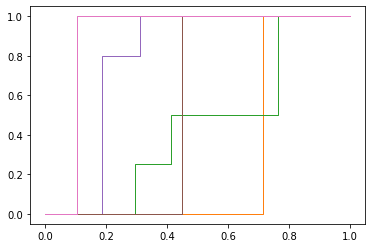

In [35]:
for i in range (7):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i],tpr[i], lw = 1, label = 'class {}'.format(i))
    